# Data Analysis and Prediction using Customer Data


### In this project we'll analyse how different categories such as age, gender, demography effects what a customer prefers to buy from an e-commerce website

### Importing Python Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
import scipy

from scipy import stats

In [89]:
import sklearn
from sklearn.preprocessing import LabelEncoder

### Importing customer dataset 

In [90]:
colnames=['Time','Age','Gender','City','State','Product Category']
data=pd.read_excel("D:\\PU\\data analytics with python\\Tania_Customer_data.xlsx",names=colnames)

In [91]:
data.shape

(105, 6)

In [92]:
data.dtypes

Time                datetime64[ns]
Age                         object
Gender                      object
City                        object
State                       object
Product Category            object
dtype: object

In [93]:
data

,Time,Age,Gender,City,State,Product Category
0,2021-08-01 21:34:29.289,18-25,Female,Jalandhar,Punjab,Tech Accessories
1,2021-08-01 21:34:57.059,18-25,Male,Jalandhar,Punjab,Tech Accessories
2,2021-08-01 21:35:14.679,51-55,Female,Jalandhar,Punjab,Clothes
3,2021-08-01 21:35:43.554,55+,Male,Jalandhar,Punjab,Clothes
4,2021-08-01 21:36:00.371,51-55,Female,Ludhiana,Punjab,Clothes
...,...,...,...,...,...,...
100,2021-08-04 00:03:38.226,0-17,Female,Kolkata,West bengal,Books
101,2021-08-04 00:03:38.226,0-17,Female,Kolkata,West bengal,Books
102,2021-08-04 00:03:38.226,0-17,Female,Kolkata,West bengal,Books
103,2021-08-02 16:44:13.962,0-17,Male,Surat,Gujrat,Books


In [94]:
data=data.drop(['Time'],axis=1)

#### We'll use 3 Independent Factors for our data analysis -AGE,GENDER,CITY. all 3 are further independent of each other.

### Checking for any NA Values

In [95]:
data.isna().sum()

Age                 0
Gender              0
City                0
State               0
Product Category    0
dtype: int64

### Distribution of Categories

Text(0.5, 1.0, 'Product Categories Distribution')

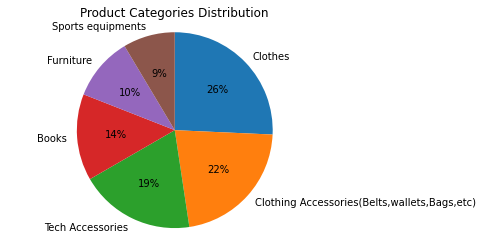

In [96]:
sort_counts=data['Product Category'].value_counts()
plt.pie(sort_counts,labels=sort_counts.index.values,startangle=90,counterclock=False,autopct="%.0f%%")
plt.axis('equal')
plt.title('Product Categories Distribution')

From Above Pie chart we can see that categories Clothing accessories,Tech Accessories and clothes are dominated preference of customers

In [97]:
data.describe()

,Age,Gender,City,State,Product Category
count,105,105,105,105,105
unique,7,2,31,22,6
top,18-25,Female,Jalandhar,Punjab,Clothes
freq,40,57,18,32,27


Our data has maximum frequency of female and customers aged between 18-25

### Finding all unique values in columns

In [98]:
print("Age Categories: %s\nGender Categories: %s\nCity Inputs :%s\nState Inputs :%s\nProduct Categories :%s"%(data['Age'].unique(),data['Gender'].unique(),data['City'].unique().sort(),data['State'].unique(),data['Product Category'].unique()))

Age Categories: ['18-25' '51-55' '55+' '26-35' '0-17' '36-45' '46-50']
Gender Categories: ['Female' 'Male']
City Inputs :None
State Inputs :['Punjab' 'Maharashtra ' 'Delhi' 'Uttar Pradesh' 'Punjab ' 'Maharashtra'
 'West Bengal' 'Tamil nadu ' 'Up' 'Haryana' 'Himachal Pradesh'
 'Chandigarh ' 'Gujrat' 'Kerala ' 'Tamip Nadu' 'Tamilnadu' 'Tamilandu'
 'Gujarat' 'Tamil Nadu ' 'Gujarat ' 'West bengal' 'Uttar pradesh']
Product Categories :['Tech Accessories' 'Clothes' 'Furniture' 'Books'
 'Clothing Accessories(Belts,wallets,Bags,etc)' 'Sports equipments']


#### Since there are some spelling mistakes in city and state name column. We'll correct them all with same Name fro unique values

Correcting State Names

In [99]:
data['State'].where(~(data['State'].str.contains('Tam')),other="Tamil Nadu",inplace=True)
data['State'].where(~(data['State'].str.contains('Up|Uttar')),other="Uttar Pradesh",inplace=True)
data['State'].where(~(data['State'].str.contains('jab')),other="Punjab",inplace=True)
data['State'].where(~(data['State'].str.contains('Maharas')),other="Maharashtra",inplace=True)
data['State'].where(~(data['State'].str.contains('West')),other="West Bengal",inplace=True)
data['State'].where(~(data['State'].str.contains('Guj')),other="Gujarat",inplace=True)
data['State'].where(~(data['State'].str.contains('Chand')),other="Chandigarh",inplace=True)
data['State'].where(~(data['State'].str.contains('Kerala')),other="Kerala",inplace=True)

In [100]:
unique_city=data['City'].unique()
unique_city.sort()
unique_city

array(['Ahmedabad ', 'Chandigarh ', 'Chennai ', 'Delhi', 'Jaladhar',
       'Jalandhar', 'Jalandhar ', 'Jalandhar City', 'Jalandhar city',
       'Jalandhar city ', 'Kolkata', 'Lucknow ', 'Ludhiana', 'Ludhiana ',
       'Mansa', 'Mathura', 'Mohali', 'Mumbai', 'Namakkal', 'Nangal',
       'Panipat', 'Pune', 'Pune ', 'Saharanpur', 'Salem', 'Sangrur',
       'South delhi', 'Sunam', 'Surat', 'Thodupuzha ', 'Yamunanagar'],
      dtype=object)

Correcting City Names

In [101]:
data['City'].where(~(data['City'].str.contains('Chandigarh')),other="Chandigarh",inplace=True)
data['City'].where(~(data['City'].str.contains('Chennai')),other="Chennai",inplace=True)
data['City'].where(~(data['City'].str.contains('dhar')),other="Jalandhar",inplace=True)
data['City'].where(~(data['City'].str.contains('Lucknow')),other="Lucknow",inplace=True)
data['City'].where(~(data['City'].str.contains('dhar')),other="Jalandhar",inplace=True)
data['City'].where(~(data['City'].str.contains('delhi|Delhi')),other="Delhi",inplace=True)
data['City'].where(~(data['City'].str.contains('Pune')),other="Pune",inplace=True)
data['City'].where(~(data['City'].str.contains('Thodupuzha')),other="Thodupuzha",inplace=True)
data['City'].where(~(data['City'].str.contains('Ludhiana')),other="Ludhiana",inplace=True)

In [102]:
unique_city_clean=data['City'].unique()
unique_city_clean.sort()
unique_city_clean

array(['Ahmedabad ', 'Chandigarh', 'Chennai', 'Delhi', 'Jalandhar',
       'Kolkata', 'Lucknow', 'Ludhiana', 'Mansa', 'Mathura', 'Mohali',
       'Mumbai', 'Namakkal', 'Nangal', 'Panipat', 'Pune', 'Saharanpur',
       'Salem', 'Sangrur', 'Sunam', 'Surat', 'Thodupuzha', 'Yamunanagar'],
      dtype=object)

#### Now We'll categorize the city column into Tier 1 and Tier 2 Cities to see later if products bought by customers is effected by customer's place oforigin

In [103]:
data['City Tier']='Tier 2'

In [104]:
data['City Tier'].where(~(data['City'].str.contains('Bangalore|Chennai|Delhi|Hyderabad|Kolkata|Mumbai|Ahmedabad|Pune')),other="Tier 1",inplace=True)


#### Similarly we'll Categorize our age column into Youngsters,Middle Aged and oldaged

In [105]:
data['Age Category']='OldAged'

In [107]:
data['Age Category'].where(~(data['Age'].str.contains('0-17')),other="Youngsters",inplace=True)
data['Age Category'].where(~(data['Age'].str.contains('18-25|26-35|36-45')),other="Middle Aged ",inplace=True)
data['Age Category'].where(~(data['Age'].str.contains('46-50|50-55|55+')),other="OldAged",inplace=True)


In [108]:
data_classification=data.drop(['Age','City','State'],axis=1) #Dropping columns not required now

In [109]:
data_classification

,Gender,Product Category,City Tier,Age Category
0,Female,Tech Accessories,Tier 2,Middle Aged
1,Male,Tech Accessories,Tier 2,Middle Aged
2,Female,Clothes,Tier 2,OldAged
3,Male,Clothes,Tier 2,OldAged
4,Female,Clothes,Tier 2,OldAged
...,...,...,...,...
100,Female,Books,Tier 1,Youngsters
101,Female,Books,Tier 1,Youngsters
102,Female,Books,Tier 1,Youngsters
103,Male,Books,Tier 2,Youngsters


#### All three independent columns are Categorical, So to be able to use them in any Model we'll label them as numeric categories

In [110]:
age_label=LabelEncoder()
gender_label=LabelEncoder()
city_label=LabelEncoder()
Product_label=LabelEncoder()

In [111]:
data_classification['age_lab']=age_label.fit_transform(data_classification['Age Category'])
data_classification['gender_lab']=gender_label.fit_transform(data_classification['Gender'])
data_classification['city_lab']=city_label.fit_transform(data_classification['City Tier'])
data_classification['Product_lab']=Product_label.fit_transform(data_classification['Product Category'])


In [112]:
data_classification_new=data_classification.drop(['Gender','Product Category','City Tier','Age Category'],axis=1)

#### Seeing the distribution of all categories count in different product categories

In [113]:
data_classification_new.groupby(['Product_lab']).count()

,age_lab,gender_lab,city_lab
Product_lab,,,
0,15,15,15
1,27,27,27
2,23,23,23
3,11,11,11
4,9,9,9
5,20,20,20


### Preparing our dataset for model training and testing

#### Putting our independent variables into X variable
#### Putting our dependent variable i.e. Product category into Y variable

In [114]:
x=data_classification_new[['age_lab','gender_lab','city_lab']]
y=data_classification_new['Product_lab']

#### Dividing our dataset into training and testing using sklearn library

In [115]:
train_x, test_x, train_y, test_y = train_test_split(x,y , test_size=0.3, random_state=37)


#### Since both Independent and dependent variable are categorical in nature we'll chose Decision Tree Classifier to predict product category based on AGE,GENDER AND CITY OF THE CUSTOMER

In [116]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()        #Initializing DecisionTreeClassfier
model_dt=model.fit(train_x,train_y)   #TRAINING OUR MODEL

#### To check the accuracy of our model we'll import metrics library

In [117]:
from sklearn import metrics
        

#### Predicting Product category for the test data that we had splitted earlier

In [118]:
y_pred=model_dt.predict(test_x)

In [119]:
y_pred

array([0, 2, 0, 4, 2, 3, 2, 4, 0, 3, 3, 5, 3, 2, 5, 4, 2, 1, 1, 3, 1, 4,
       2, 5, 2, 4, 5, 0, 2, 2, 5, 0])

#### Checking Accuracy Score

In [120]:
metrics.accuracy_score(test_y,y_pred)

0.5625

Conclusion:Now the result isn't satisfying ,since .5625 score is not enough to make predictions. The model can be enhanced with more and
unbiased data. The data used here is seen to be more inclined to 1-2 categories.Hence our model is usually predicting those 
categories to be more accurate. It can also be resolved using weights for each class/category.
Or we can try some other machine learning or deep learning model for better prediction.

Checking accuracy using F1 SCORE Method

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
confusion_matrix(test_y, y_pred)


array([[2, 0, 0, 0, 2, 1],
       [0, 3, 4, 0, 0, 0],
       [0, 0, 4, 2, 0, 1],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [3, 0, 1, 0, 0, 3]], dtype=int64)

In [123]:
from sklearn.metrics import f1_score
f1_score(test_y,y_pred,average='weighted')

0.5531250000000001

## Checking which factor is effecting the most our results

### We'll use "Chi Square" Test to check Significance of each factor we have used in our model

In [124]:
data_crosstab_gender = pd.crosstab(data_classification_new['gender_lab'],data_classification_new['Product_lab'],margins = False)
data_crosstab_gender   #Frequency table for gender and product category distribution

Product_lab,0,1,2,3,4,5
gender_lab,,,,,,
0,6,19,17,10,0,5
1,9,8,6,1,9,15


In [125]:
stat, p, dof, expected = chi2_contingency(data_crosstab_gender)
print('DEGREE OF FREEDOM=%d' % dof)
print(expected)   #The expected frequency for gender category

DEGREE OF FREEDOM=5
[[ 8.14285714 14.65714286 12.48571429  5.97142857  4.88571429 10.85714286]
 [ 6.85714286 12.34285714 10.51428571  5.02857143  4.11428571  9.14285714]]


In [126]:
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.990, critical=15.086, stat=31.164
Dependent (reject H0)


#### We can conclude that Product Category is dependent on Gender Category

In [127]:
data_crosstab_city = pd.crosstab(data_classification_new['city_lab'],data_classification_new['Product_lab'],margins = False)
data_crosstab_city   #Frequency table for City and product category distribution

Product_lab,0,1,2,3,4,5
city_lab,,,,,,
0,9,2,6,8,0,9
1,6,25,17,3,9,11


In [128]:
stat, p, dof, expected = chi2_contingency(data_crosstab_city)
print('DEGREE OF FREEDOM=%d' % dof)
print(expected)

DEGREE OF FREEDOM=5
[[ 4.85714286  8.74285714  7.44761905  3.56190476  2.91428571  6.47619048]
 [10.14285714 18.25714286 15.55238095  7.43809524  6.08571429 13.52380952]]


In [129]:
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.990, critical=15.086, stat=27.275
Dependent (reject H0)


####  We can conclude that Product Category is dependent on City Category

In [130]:
data_crosstab_age = pd.crosstab(data_classification_new['age_lab'],data_classification_new['Product_lab'],margins = False)
data_crosstab_age

Product_lab,0,1,2,3,4,5
age_lab,,,,,,
0,5,12,21,9,0,17
1,0,15,2,2,0,3
2,10,0,0,0,9,0


In [131]:
stat, p, dof, expected = chi2_contingency(data_crosstab_age)
print('DEGREE OF FREEDOM=%d' % dof)
print(expected)

DEGREE OF FREEDOM=10
[[ 9.14285714 16.45714286 14.01904762  6.7047619   5.48571429 12.19047619]
 [ 3.14285714  5.65714286  4.81904762  2.3047619   1.88571429  4.19047619]
 [ 2.71428571  4.88571429  4.16190476  1.99047619  1.62857143  3.61904762]]


In [132]:
prob = 0.99
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

probability=0.990, critical=23.209, stat=104.795
Dependent (reject H0)


## In Conclusion,
### We can say that Age is the most dominating Factor affecting the Products being bought.
### People in age group 1-25 prefer byuing books 
### People in age group 17-25 prefer tech accessories
### Old aged people have more trust in buying clothes from online sites.
### For other categories the result has been a mixture of different categories.

### Scope of Improvement
#### As discussed earlier the model is biased because of biased distribution of data which can be corrected with more data or using 
#### weights.
#### We can also include more categories which effect customer choices. Eg whether they are employed or are a student. 
#### We can divide the cities based on income ctegories.